# GRID SEARCH TO TUNE DECISION TREE

**Import necessary packages and modules**

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Load and preprocess data

### 1.1 Load and display training and test data

**Load and display training data**

In [4]:
data = pd.read_csv('./../../data/titanic_train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Load and display test data**

In [5]:
test_data = pd.read_csv('../../data/titanic_test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.2 Preprocess training data

**Fill the nan with 0 and valued data with 1 for the column of cabin**

In [6]:
data['Cabin'] = data['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)

**Fill the nan with feature median for the columns of Age, Pclass, SibSp, and Fare**

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Pclass'] = data['Pclass'].fillna(data['Pclass'].median())
data['SibSp'] = data['SibSp'].fillna(data['SibSp'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

**Fill the nan with feature mode for the column of Gender and Embarked**

In [8]:
data['Sex'] = data['Sex'].fillna(data['Sex'].mode())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

**Encode the Gender and Survived column**

In [9]:
data['Sex'] = data['Sex'].apply(lambda x: 0 if x == "male" else 1)
data['Survived'] = data['Survived'].apply(lambda x: 1 if x ==1 else 0)

**Create a new column by adding the number of siblings and parents**

In [10]:
data['Family_Members'] = data['SibSp'] + data['Parch']

**One hot encode the Embarked column**

In [11]:
embarked_categories = pd.get_dummies(data['Embarked'], prefix = 'Embarked')
data = pd.concat([data, embarked_categories], axis=1)

**Display the processed data**

In [12]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Members,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,0,0,0,1


**Remove the unwanted features**

In [13]:
removed_features = ["Name", "Ticket", "Embarked", "SibSp", "Parch", "PassengerId"]
data = data.drop(removed_features, axis = 1)
data.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Family_Members,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0,1,0,0,1
1,1,1,1,38.0,71.2833,1,1,1,0,0
2,1,3,1,26.0,7.9250,0,0,0,0,1
3,1,1,1,35.0,53.1000,1,1,0,0,1
4,0,3,0,35.0,8.0500,0,0,0,0,1


### 1.3 Preprocess the test data

In [14]:
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Pclass'] = test_data['Pclass'].fillna(test_data['Pclass'].median())
test_data['SibSp'] = test_data['SibSp'].fillna(test_data['SibSp'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data['Sex'] = test_data['Sex'].fillna(test_data['Sex'].mode())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode())
test_data['Sex'] = test_data['Sex'].apply(lambda x: 0 if x == "male" else 1)
test_data['Family_Members'] = test_data['SibSp'] + test_data['Parch']
embarked_categories = pd.get_dummies(test_data['Embarked'], prefix = 'Embarked')
test_data = pd.concat([test_data, embarked_categories], axis=1)
removed_features = ["Name", "Ticket", "Embarked", "SibSp", "Parch"]
test_data = test_data.drop(removed_features, axis = 1)
test_data.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Family_Members,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,7.8292,0,0,0,1,0
1,893,3,1,47.0,7.0000,0,1,0,0,1
2,894,2,0,62.0,9.6875,0,0,0,1,0
3,895,3,0,27.0,8.6625,0,0,0,0,1
4,896,3,1,22.0,12.2875,0,2,0,0,1


### 1.4 Train test split the training data into separate training and validation set

**Features and output of the model**

In [15]:
features = data.columns.tolist()
output = "Survived"
features.remove(output)

**Splitting the data into train and validation set**

In [16]:
train_data, valid_data = train_test_split(data, test_size = 0.2, random_state = 0)

## 2. Investigate the relationship between max depth and classification error

In [17]:
list_of_max_depth = np.linspace(1,20, 20, dtype=int).tolist()
print("list of min_samples_split:", list_of_max_depth)

list of min_samples_split: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


### 2.1 Train decision tree models having different max_depth

In [18]:
# lists to store the classification errors and the number of nodes of the different models
list_of_errors = []
list_of_num_of_nodes = []
# iterate through each maximum depth in the list
for max_depth in list_of_max_depth:     
    # train the decision tree model with the given max depth
    model = DecisionTreeClassifier(max_depth=max_depth,min_samples_split=5, min_impurity_decrease=0)
    model.fit(train_data[features], train_data[output])
    # compute predictions
    predictions = model.predict(valid_data[features])
    # compute classification error using the validation set and append it to the designated list
    list_of_errors.append(1-accuracy_score(valid_data[output], predictions)) 
    # extract the number of nodes of the fitted decision tree and append it to the designated list
    list_of_num_of_nodes.append(model.tree_.node_count) 

**Store the results in a pandas dataframe and sort the data by max_depth**

In [19]:
max_depth_result = pd.DataFrame({"max_depth": list_of_max_depth,
                                "num_of_nodes":list_of_num_of_nodes,
                                "classification_error":list_of_errors})
max_depth_result = max_depth_result.sort_values(["max_depth",
                                                "num_of_nodes",
                                                "classification_error"])
max_depth_result.head(len(list_of_max_depth))

,max_depth,num_of_nodes,classification_error
0,1,3,0.212291
1,2,7,0.217877
2,3,15,0.178771
3,4,29,0.184358
4,5,49,0.184358
5,6,71,0.167598
6,7,97,0.162011
7,8,127,0.178771
8,9,157,0.150838
9,10,181,0.145251


### 2.2 Plot of classification error vs max depth & number of nodes

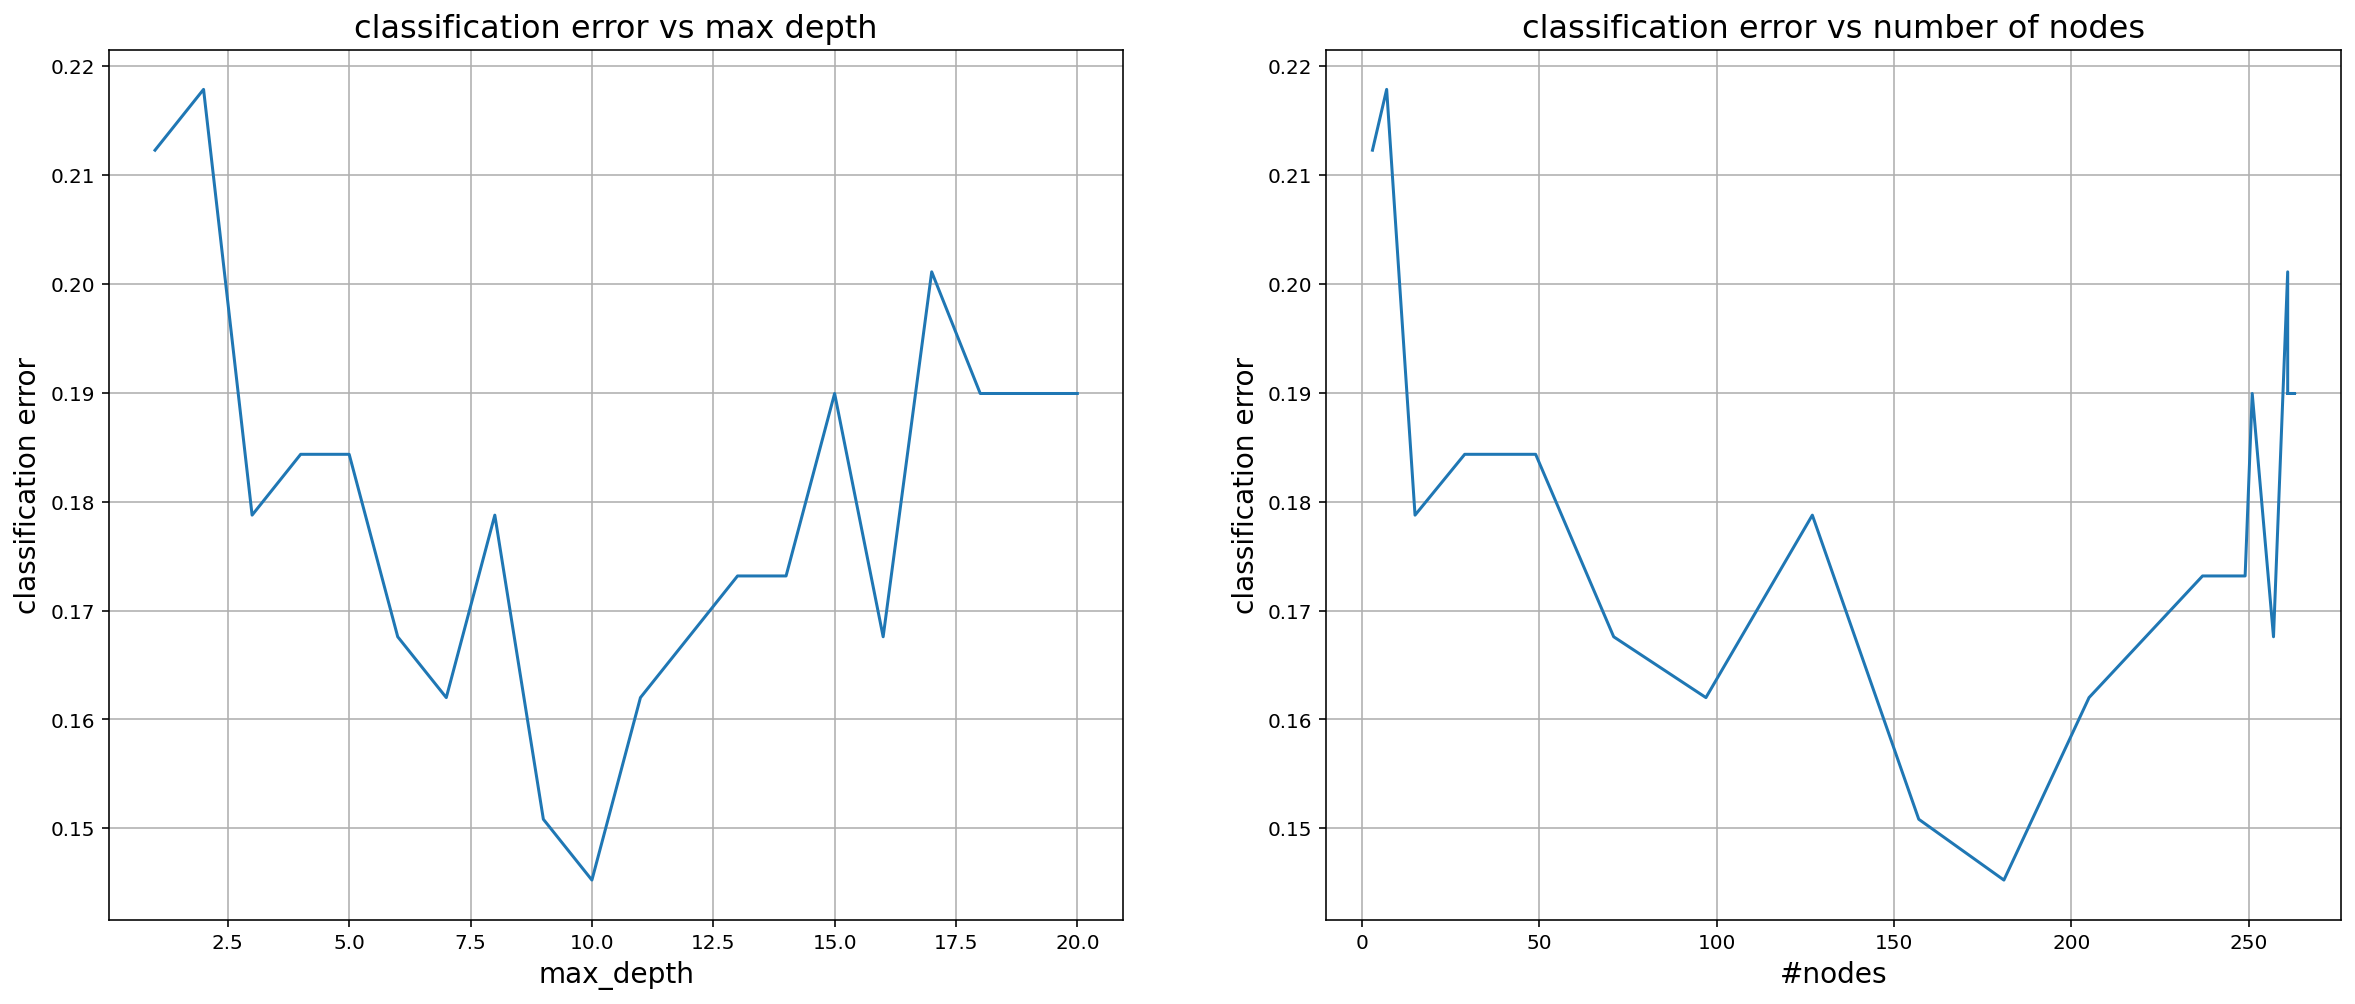

In [20]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)
plt.subplot(1,2, 1)
plt.plot(max_depth_result.max_depth, max_depth_result.classification_error)
plt.xlabel("max_depth", fontsize = 14)
plt.ylabel("classification error", fontsize = 14)
plt.title("classification error vs max depth", fontsize = 16)
plt.grid()
plt.subplot(1,2, 2)
plt.plot(max_depth_result.num_of_nodes,max_depth_result.classification_error)
plt.xlabel("#nodes", fontsize = 14)
plt.ylabel("classification error", fontsize = 14)
plt.title("classification error vs number of nodes", fontsize = 16)
plt.grid()
plt.show()

In [21]:
print("Correlation between max depth and number of nodes:", np.corrcoef(list_of_max_depth, list_of_num_of_nodes)[0][1])

Correlation between max depth and number of nodes: 0.9639194504309309


## 3. Investigate the relationship between min_samples_split and classification error

**List of min_samples_split values**

In [22]:
list_of_min_samples_split = np.linspace(3,35, 32, dtype=int).tolist()
print("list of min_samples_split:", list_of_min_samples_split)

list of min_samples_split: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35]


### 3.1 Train decision tree models having different min_samples_split values

In [23]:
# lists to store the classification errors and the number of nodes of different models
list_of_errors = []
list_of_num_of_nodes = []
# iterate through each min_samples_split in the list
for min_samples_split in list_of_min_samples_split:     
    # train the decision tree model with the given min_samples_split
    model = DecisionTreeClassifier(max_depth=20,min_samples_split=min_samples_split, min_impurity_decrease=0)
    model.fit(train_data[features], train_data[output])
    # compute predictions
    predictions = model.predict(valid_data[features])
    # compute classification error using the validation set and append it to the designated list
    list_of_errors.append(1-accuracy_score(valid_data[output], predictions)) 
    # extract the number of nodes of the fitted decision tree and append it to the designated list
    list_of_num_of_nodes.append(model.tree_.node_count) 

**Store results in a pandas dataframe and sort the data by min_samples_split**

In [24]:
min_samples_split_result = pd.DataFrame({"min_samples_split": list_of_min_samples_split,
                                         "num_of_nodes":list_of_num_of_nodes,
                                         "classification_error":list_of_errors})
min_samples_split_result = min_samples_split_result.sort_values(['min_samples_split',
                                                                 "num_of_nodes",
                                                                 "classification_error"])
min_samples_split_result.head(len(list_of_min_samples_split))

,min_samples_split,num_of_nodes,classification_error
0,3,309,0.178771
1,4,275,0.189944
2,5,263,0.173184
3,6,239,0.167598
4,7,217,0.162011
5,8,211,0.173184
6,9,201,0.173184
7,10,189,0.156425
8,11,179,0.150838
9,12,167,0.156425


### 3.2 Plot of classification error vs min_samples_split & number of nodes

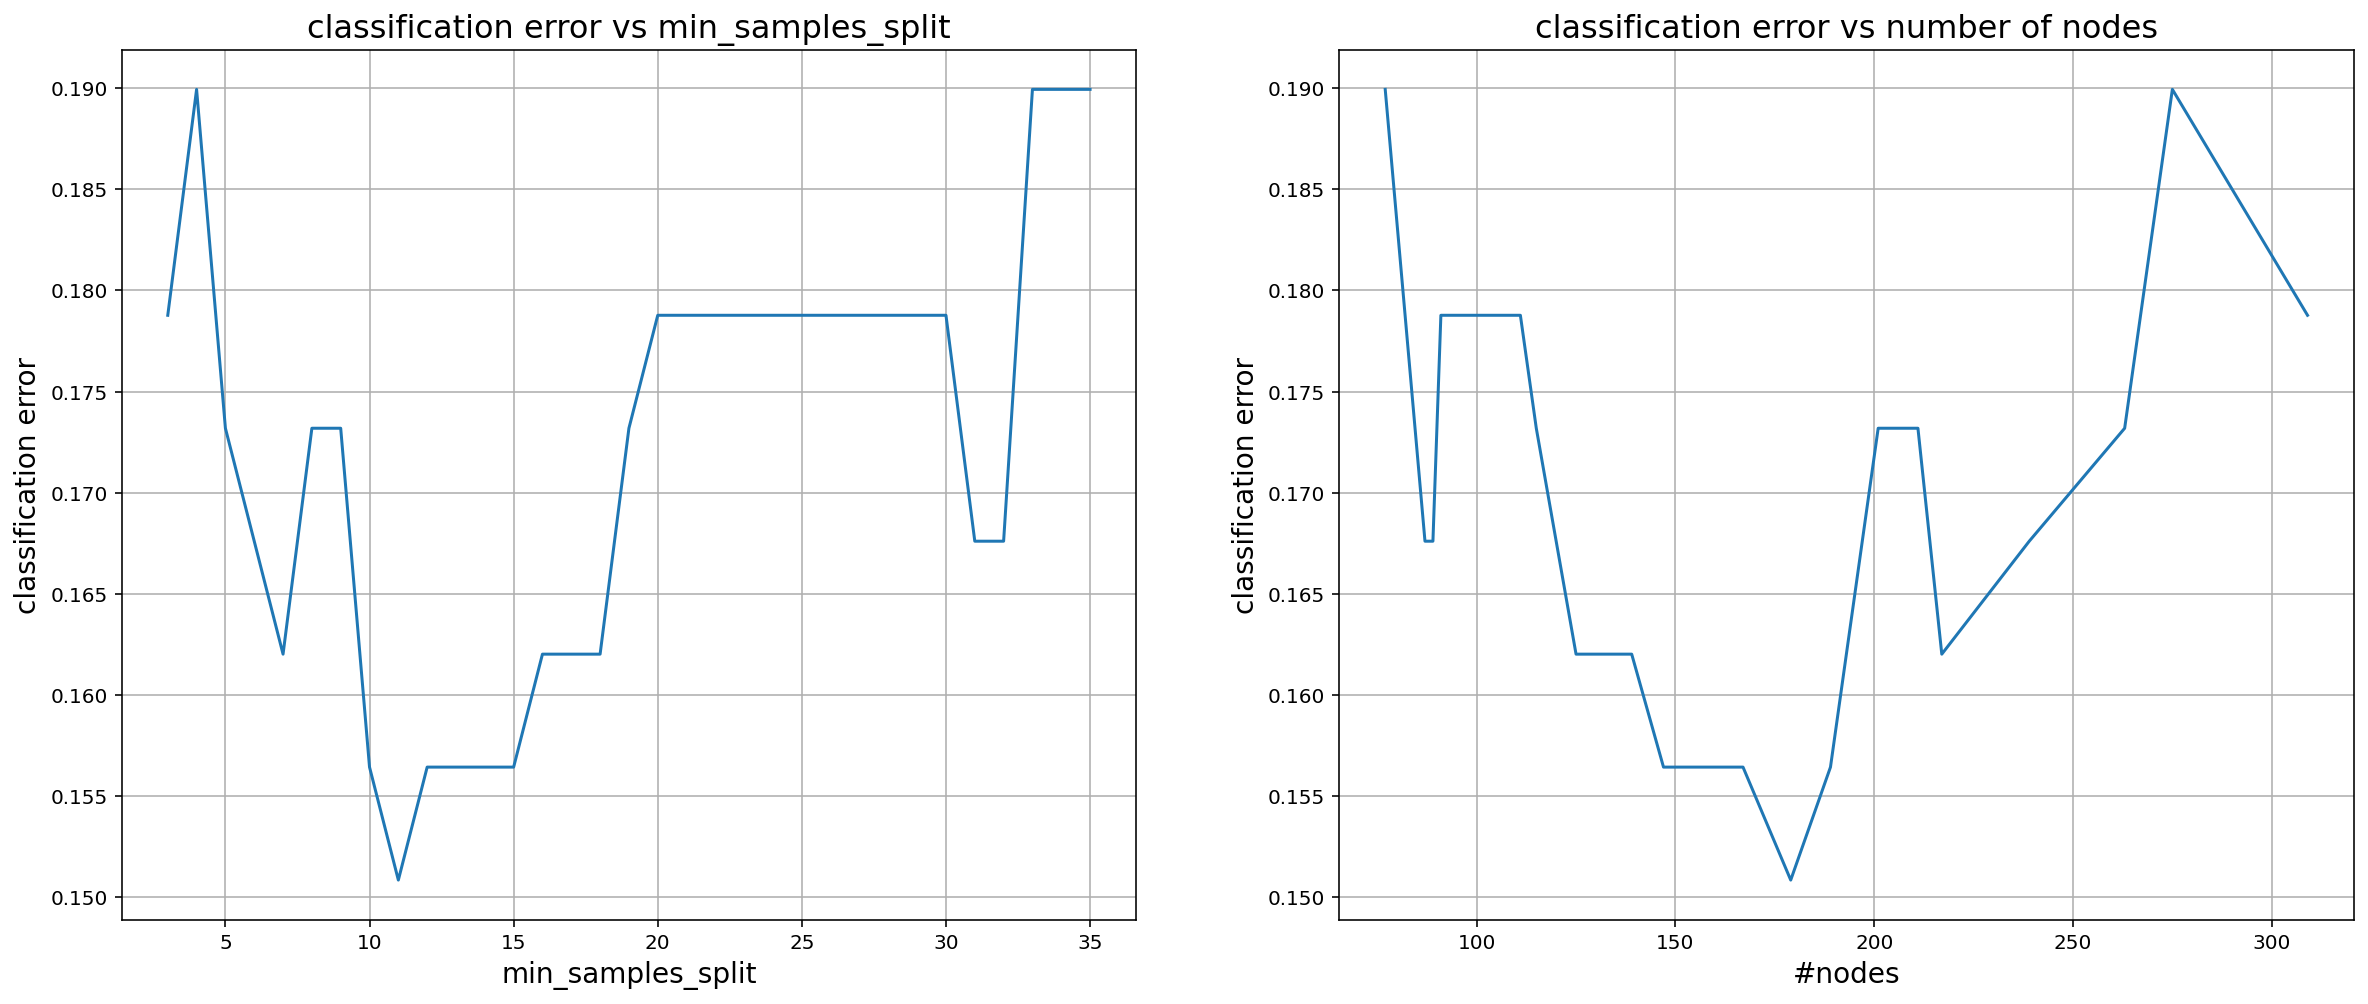

In [25]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)
plt.subplot(1,2, 1)
plt.plot(min_samples_split_result.min_samples_split, min_samples_split_result.classification_error)
plt.xlabel("min_samples_split", fontsize = 14)
plt.ylabel("classification error", fontsize = 14)
plt.title("classification error vs min_samples_split", fontsize = 16)
plt.grid()
plt.subplot(1,2, 2)
plt.plot(min_samples_split_result.num_of_nodes,min_samples_split_result.classification_error)
plt.xlabel("#nodes", fontsize = 14)
plt.ylabel("classification error", fontsize = 14)
plt.title("classification error vs number of nodes", fontsize = 16)
plt.grid()
plt.show()

In [26]:
print("Correlation between min_samples_split and number of nodes:", np.corrcoef(list_of_min_samples_split, list_of_num_of_nodes)[0][1])

Correlation between min_samples_split and number of nodes: -0.9307842578953252


## 4. Hyper-parameter optimization using GridSearch

**Import gridsearch module from sklearn**

In [27]:
from sklearn.model_selection import GridSearchCV

**Create parameter grid using lists of max_depth, min_samples_split, and min_impurity_decrease**

In [28]:
list_of_max_depth = np.linspace(5,20,15, dtype=int).tolist()
list_of_min_samples_split = np.linspace(5, 20, 15, dtype=int).tolist()
list_of_min_impurity_decrease = np.logspace(-3, -1, 10).tolist()
print("list of max_depth:",list_of_max_depth)
print("list of min_samples_split:",list_of_min_samples_split)
print("list of min_impurity_decrease:",list_of_min_impurity_decrease)
param_grid = [{"max_depth":list_of_max_depth,
               "min_samples_split":list_of_min_samples_split,
               "min_impurity_decrease":list_of_min_impurity_decrease}]

list of max_depth: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
list of min_samples_split: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
list of min_impurity_decrease: [0.001, 0.0016681005372000592, 0.0027825594022071257, 0.004641588833612777, 0.007742636826811269, 0.01291549665014884, 0.021544346900318832, 0.03593813663804626, 0.05994842503189409, 0.1]


**Train multiple classifiers (2250 classifiers) through gridsearch using the original training data**

In [29]:
grid_search_classifier = GridSearchCV(DecisionTreeClassifier(criterion="gini", splitter='best'),
                                      param_grid=param_grid, scoring = 'accuracy',
                                      cv = 5, refit=True, n_jobs =-1)
grid_search_classifier.fit(data[features], data[output])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                        16, 17, 18, 20],
                          'min_impurity_decrease': [0.001,
                                                    0.0016681005372000592,
                                                    0.0027825594022071257,
                                                    0.004641588833612777,
                                                    0.007742636826811269,
                                                    0.01291549665014884,
                                                    0.021544346900318832,
                                                    0.03593813663804626,
                                                    0.05994842503189409, 0.1],
                          'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                14, 15, 16, 17,

**Store the gridsearch results in a pandas dataframe**

In [30]:
results = pd.DataFrame()
# creating columns for parameters of each classifier
results['max_depth'] = grid_search_classifier.cv_results_['param_max_depth'].data
results['min_samples_split'] = grid_search_classifier.cv_results_['param_min_samples_split'].data
results['min_impurity_decrease'] = grid_search_classifier.cv_results_['param_min_impurity_decrease'].data
# creating column for test score
results['cv accuracy'] = grid_search_classifier.cv_results_['mean_test_score'].data
# print head and tail
print("HEAD:","\n",results.head(10), "\n")
print("TAIL:","\n",results.tail(10), "\n")
print("NUMBER OF CLASSIFIERS:", len(results))

HEAD: 
   max_depth min_samples_split min_impurity_decrease  cv accuracy
0         5                 5                 0.001     0.809196
1         5                 6                 0.001     0.809196
2         5                 7                 0.001     0.809196
3         5                 8                 0.001     0.806949
4         5                 9                 0.001     0.806949
5         5                10                 0.001     0.808072
6         5                11                 0.001     0.806955
7         5                12                 0.001     0.805831
8         5                13                 0.001     0.806955
9         5                14                 0.001     0.805831 

TAIL: 
      max_depth min_samples_split min_impurity_decrease  cv accuracy
2240        20                10                   0.1     0.786737
2241        20                11                   0.1     0.786737
2242        20                12                   0.1     0.78

## 5. Compute predictions using the best classifier and create a submission file for kaggle

**Best parameter set**

In [31]:
print("best parameter set:",grid_search_classifier.best_params_)

best parameter set: {'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 5}


**Accuracy of the best classifier**

In [32]:
grid_search_classifier.best_score_ 

0.8294080723118448

**Compute predictions using the best classifier for the test set**

In [33]:
predictions = grid_search_classifier.predict(test_data[features])

**Create submission dataframe**

In [34]:
submission_data = pd.DataFrame()
submission_data['PassengerId'] = test_data['PassengerId']
submission_data['Survived'] = predictions
submission_data.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


**Save the submission dataframe as csv file in the designated directory**

In [35]:
submission_data.to_csv("./submission/submission.csv", index = False)